In [1]:
import sys
sys.path.append("../../")

from sklearn.model_selection import KFold
from MultinomialWithEvidence import MultinomialNB
from TFIDFVectorizer import TFIDF
import pandas as pd
from preprocessing import preprocessing_text_with_lemma
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
fix_file = "../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)

In [3]:
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [10]:
print(len(X))

4000


In [5]:
tfidf_vectorizer = TFIDF(X)
mnb = MultinomialNB()

In [6]:
kf = KFold(n_splits=10, shuffle=True, random_state=32)

scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train_tidf = tfidf_vectorizer.transform_tfidf(X_train)
    X_test_tidf = tfidf_vectorizer.transform_tfidf(X_test)
    mnb.fit(X_train_tidf, y_train, tfidf_vectorizer.idf)
    score = mnb.score(X_test_tidf, y_test)
    scores.append(score)

{0: 1.0, 1: 0.0}
{0: 0.84, 1: 0.16}
{0: 0.008, 1: 0.992}
{0: 0.972, 1: 0.028}
{0: 1.0, 1: 0.0}
{0: 0.084, 1: 0.916}
{0: 0.757, 1: 0.243}
{0: 0.997, 1: 0.003}
{0: 0.389, 1: 0.611}
{0: 0.965, 1: 0.035}
{0: 0.57, 1: 0.43}
{0: 0.853, 1: 0.147}
{0: 0.359, 1: 0.641}
{0: 0.931, 1: 0.069}
{0: 0.159, 1: 0.841}
{0: 0.681, 1: 0.319}
{0: 1.0, 1: 0.0}
{0: 0.413, 1: 0.587}
{0: 0.953, 1: 0.047}
{0: 0.072, 1: 0.928}
{0: 0.902, 1: 0.098}
{0: 0.827, 1: 0.173}
{0: 0.98, 1: 0.02}
{0: 0.797, 1: 0.203}
{0: 0.861, 1: 0.139}
{0: 0.958, 1: 0.042}
{0: 0.876, 1: 0.124}
{0: 0.953, 1: 0.047}
{0: 0.977, 1: 0.023}
{0: 0.058, 1: 0.942}
{0: 0.79, 1: 0.21}
{0: 0.996, 1: 0.004}
{0: 0.998, 1: 0.002}
{0: 0.986, 1: 0.014}
{0: 0.139, 1: 0.861}
{0: 0.587, 1: 0.413}
{0: 0.313, 1: 0.687}
{0: 0.888, 1: 0.112}
{0: 0.329, 1: 0.671}
{0: 0.341, 1: 0.659}
{0: 0.906, 1: 0.094}
{0: 0.988, 1: 0.012}
{0: 0.32, 1: 0.68}
{0: 0.034, 1: 0.966}
{0: 0.341, 1: 0.659}
{0: 0.953, 1: 0.047}
{0: 0.994, 1: 0.006}
{0: 0.02, 1: 0.98}
{0: 0.394, 1: 0.

In [7]:
print("Mean CV Accuracy:", round(np.mean(scores), 3))

Mean CV Accuracy: 0.804


In [8]:
print("Cross Validation scores:", scores)

Cross Validation scores: [0.83, 0.7775, 0.7825, 0.8075, 0.81, 0.82, 0.8225, 0.81, 0.78, 0.8]


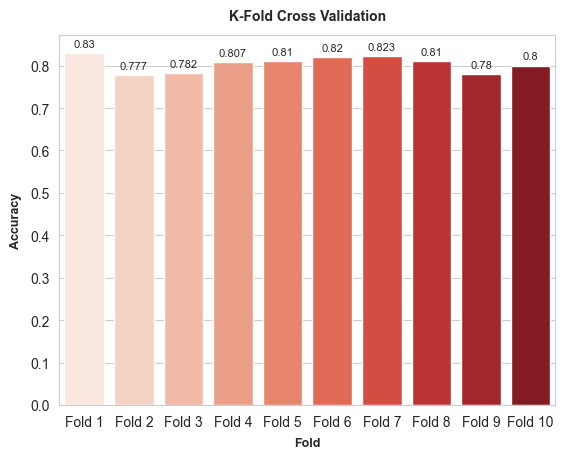

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

scenarios = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
accuracy_values = scores

# Define custom color palette with shades of red and reverse it
custom_palette = sns.color_palette("Reds_r", len(scenarios))[::-1]

sns.set_style('whitegrid')
ax = sns.barplot(x=scenarios, y=accuracy_values, palette=custom_palette)
plt.title('K-Fold Cross Validation', fontsize=10, fontweight='bold', pad=11)
plt.xlabel('Fold', fontsize=9, fontweight='semibold', labelpad=6)  # Add x-axis title
plt.ylabel('Accuracy', fontsize=9, fontweight='semibold', labelpad=6)   # Add y-axis title

# Add numeric values above the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.show()